In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
cl_Storedata =  pd.read_csv('Cl_Stored_Data.csv')
cl_Storedata

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.000000,2008.000000,0,23.595447,2011.763573,NaN
1,2,a,a,570.0,11.000000,2007.000000,1,13.000000,2010.000000,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.000000,2006.000000,1,14.000000,2011.000000,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.000000,2009.000000,0,23.595447,2011.763573,NaN
4,5,a,a,29910.0,4.000000,2015.000000,0,23.595447,2011.763573,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.000000,2014.000000,1,31.000000,2013.000000,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.000000,2006.000000,0,23.595447,2011.763573,NaN
1112,1113,a,c,9260.0,7.224704,2008.668857,0,23.595447,2011.763573,NaN
1113,1114,a,c,870.0,7.224704,2008.668857,0,23.595447,2011.763573,NaN


In [3]:
cl_Storedata.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            0
CompetitionOpenSinceMonth      0
CompetitionOpenSinceYear       0
Promo2                         0
Promo2SinceWeek                0
Promo2SinceYear                0
PromoInterval                544
dtype: int64

In [4]:
cl_traindata = pd.read_csv('cl.traindata.csv')
cl_traindata

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,1,1
1,2,5,2015-07-31,6064,625,1,1,1,1
2,3,5,2015-07-31,8314,821,1,1,1,1
3,4,5,2015-07-31,13995,1498,1,1,1,1
4,5,5,2015-07-31,4822,559,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,2,1
1017205,1112,2,2013-01-01,0,0,0,0,2,1
1017206,1113,2,2013-01-01,0,0,0,0,2,1
1017207,1114,2,2013-01-01,0,0,0,0,2,1


In [5]:
cl_traindata.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [6]:
cl_testdata = pd.read_csv('cl.testdata.csv')
cl_testdata

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


# 2.2 Building models with sklearn pipelines

At this point, all our features are numeric. Since our problem is a regression problem, you can narrow down the list of algorithms you can use for modelling. 

A reasonable starting point will be to use any of the tree based algorithms. Random forests Regressor will make for a good start. 

Also, for the sake of this challenge, work with sklearn pipelines. This makes modeling modular and more reproducible. Working with pipelines will also significantly reduce your workload when you are moving your setup into files for the next part of the challenge. Extra marks will be awarded for doing this.


In [7]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [8]:
# Define the preprocessing steps for each column
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo'])
    ])

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=10, random_state=42)

# Assuming 'train_data' contains both features and target variable
X = cl_traindata[['Store', 'DayOfWeek', 'Customers', 'Open', 'Promo']]  # Drop the target variable column
y = cl_traindata['Sales']  # This is your target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])


# Fit the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = pipeline.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_val_pred)
print(f'Mean Squared Error on Validation Set: {mse}')

Mean Squared Error on Validation Set: 428813.8632011196


In [9]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((813767, 5), (203442, 5), (813767,), (203442,))

# 2.3 Choose a loss function

# Method-1
**Certainly! Loss functions play a crucial role in training machine learning models. For sales prediction or regression tasks, Mean Squared Error (MSE) is a commonly used loss function.**

Here's how can implement the Mean Squared Error (MSE) loss function in Python:

In [10]:
def mean_squared_error(y_val, y_val_pred):
    """
    Compute the mean squared error between true and predicted values.
    
    Parameters:
    - y_val: numpy array, values
    - y_val_pred: numpy array, predicted values
    
    Returns:
    - float, mean squared error
    """
    return np.mean((y_val - y_val_pred)**2)


mse_value = mean_squared_error(y_val, y_val_pred)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 428813.8632011196


# Method-2
**Defense for Choosing Quantile Loss**
**1.Quantile Prediction:** By focusing on specific quantiles (e.g., median, 10th percentile, etc.), we can provide a more nuanced understanding of the sales distribution. This is beneficial for businesses that want to understand the variability and uncertainty associated with sales predictions.

**2.Robustness:** The Quantile Loss function can handle scenarios where underestimating or overestimating sales has different costs or implications. For instance, underestimating sales might lead to stockouts, while overestimating could result in excess inventory costs.

**3.Interpretability:** Predicting multiple quantiles provides a comprehensive view of the sales landscape. Stakeholders can use this information to make informed decisions based on different scenarios or risk tolerances.

**Conclusion**
While traditional loss functions like Mean Squared Error (MSE) or Mean Absolute Error (MAE) provide insights into average prediction errors, the Quantile Loss function offers a more granular and interpretable approach. Given the variability and uncertainty inherent in sales predictions, focusing on quantiles can provide richer insights and more actionable recommendations for businesses.

In [11]:
def quantile_loss(y_val, y_val_pred, quantile=0.5):
    """
    Compute the quantile loss between true values (y_val) and predicted values (y_val_pred).
    
    Parameters:
    - y_val: array-like, true values
    - y_val_pred: array-like, predicted values
    - quantile: float, quantile level (default is 0.5 for median)
    
    Returns:
    - Quantile loss
    """
    residual = y_val - y_val_pred
    return np.maximum(quantile * residual, (quantile - 1) * residual).mean()

loss = quantile_loss(y_val, y_val_pred)
    
print(f"quantile_loss: {loss}")

quantile_loss: 188.74776226269813


# 2.4 Post Prediction analysis

After building a model for sales prediction, it's essential to perform post-prediction analysis to understand the model's performance and interpretability. Here's a step-by-step guide on how you can explore feature importance and estimate confidence intervals for your predictions:

1. Feature Importance:
a. For Linear Models:
If you're using linear regression or similar models, you can directly observe the coefficients (weights) assigned to each feature. A higher absolute value of a coefficient typically indicates higher importance.

In [12]:
from sklearn.linear_model import LinearRegression

# Fit the model
model = LinearRegression().fit(X_train, y_train)


# Get feature importance
feature_importance = model.coef_
print("Feature Importance:", feature_importance)

Feature Importance: [-1.49229936e-01 -5.62126037e+01  6.07197020e+00  1.67794248e+03
  1.27969324e+03]


In [13]:
lr = LinearRegression()
lr

LinearRegression()

In [14]:
lr.fit(X_train, y_train)

LinearRegression()

In [15]:
y_pred = lr.predict(X_train)
y_pred

array([ -87.86556471,  -52.64729973, 6257.12315361, ..., 8304.4054638 ,
       6390.01586512, 9333.86925836])

In [16]:
y_testresult = lr.predict(X_val)
y_testresult

array([ -128.45610741,  7424.92299491,  8601.89540481, ...,
        4003.31772003,   -84.73173605, 12941.97443006])

In [17]:
accuracy = lr.score(X_val,y_val)
accuracy

0.8507065215168227

# 2.5 Serialize models
To serve the models you built above, you need to serialize them. Save the model with the timestamp(eg. 10-08-2020-16-32-31-00.pkl). This is necessary so that you can track predictions from various models.

Assume that you’ll make daily predictions. This means you’ll have various models for predictions hence the reason for serializing the models in the format above. 


In [18]:
import joblib
from sklearn.linear_model import LinearRegression
from datetime import datetime

# Assuming you have already trained your model (e.g., linear regression)
model = LinearRegression().fit(X_train, y_train)

# Get feature importance
feature_importance = model.coef_
print("Feature Importance:", feature_importance)

# Serialize the model with a timestamp
timestamp = datetime.now().strftime("%Y-%m-%d-%H-%M-%S-%f")[:-3]  # Format: YYYY-MM-DD-HH-MM-SS-SSS
model_filename = f"model_{timestamp}.pkl"

# Save the model
joblib.dump(model, model_filename)
print(f"Model saved as {model_filename}")

Feature Importance: [-1.49229936e-01 -5.62126037e+01  6.07197020e+00  1.67794248e+03
  1.27969324e+03]
Model saved as model_2024-02-06-12-02-41-908.pkl


# 2.6 Building model with deep learning 
Deep Learning techniques can be used to predict various outcomes including but not limited to future sales. Your task is to create a deep learning model of the Long Short Term Memory which is a type of Recurrent Neural Network . 

You can use either Tensorflow or Pytorch libraries for model building. The model should not be very deep (Two layers) due to the computational requirements, it should comfortably run in google colab. 
Isolate the Rossmann Store Sales dataset into time series data


# 1. Preparing the Data:
First, we need to prepare the data in a suitable format for time series forecasting. This involves splitting the data into training and test sets and normalizing it.

In [19]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming cl_traindata and cl_testdata are your DataFrames
# and they have been loaded with appropriate data

# Get numerical columns from cl_traindata and cl_testdata
numerical_columns_train = cl_traindata.select_dtypes(include=[np.number]).columns

# Remove 'Id' column from the list of numerical columns (if it exists)
numerical_columns_train = [col for col in numerical_columns_train if col != 'Date']


# Ensure consistent column names by selecting common columns
common_columns = [col for col in numerical_columns_train]

# Scaling the data using MinMaxScaler
scaler = MinMaxScaler()

# Scale the train and test data using the common columns
train_scaled = scaler.fit_transform(cl_traindata[common_columns])


# If you want to view the scaled data
train_scaled


array([[0.00000000e+00, 6.66666667e-01, 1.26663618e-01, ...,
        1.00000000e+00, 2.50000000e-01, 1.00000000e+00],
       [8.97666068e-04, 6.66666667e-01, 1.45941133e-01, ...,
        1.00000000e+00, 2.50000000e-01, 1.00000000e+00],
       [1.79533214e-03, 6.66666667e-01, 2.00091454e-01, ...,
        1.00000000e+00, 2.50000000e-01, 1.00000000e+00],
       ...,
       [9.98204668e-01, 1.66666667e-01, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 1.00000000e+00],
       [9.99102334e-01, 1.66666667e-01, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 1.00000000e+00],
       [1.00000000e+00, 1.66666667e-01, 0.00000000e+00, ...,
        0.00000000e+00, 5.00000000e-01, 1.00000000e+00]])

**1. Isolate the Rossmann Store Sales dataset into time series data**

In [20]:
Store_train = cl_traindata.merge(cl_Storedata,on = 'Store' , copy = False)

In [21]:
Store_train1 = Store_train.copy()

In [22]:
Store_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  int64  
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [23]:
Store_train['Date'] = pd.to_datetime(Store_train['Date'])

# Set the 'Date' column as the index of the dataframe
Store_train.set_index('Date', inplace=True)

# Sort the dataframe based on the index (Date)
Store_train.sort_index(inplace=True)

# Display the first few rows of the dataframe to verify
Store_train.head

<bound method NDFrame.head of             Store  DayOfWeek  Sales  Customers  Open  Promo  StateHoliday  \
Date                                                                        
2013-01-01   1115          2      0          0     0      0             2   
2013-01-01    746          2      0          0     0      0             2   
2013-01-01    171          2      0          0     0      0             2   
2013-01-01    694          2      0          0     0      0             2   
2013-01-01    396          2      0          0     0      0             2   
...           ...        ...    ...        ...   ...    ...           ...   
2015-07-31    612          5   8161        493     1      1             1   
2015-07-31    235          5   6756        548     1      1             1   
2015-07-31   1078          5   9732        646     1      1             1   
2015-07-31    845          5   5151        378     1      1             1   
2015-07-31      1          5   5263        555

**2.Check whether your time Series Data is Stationary**

In [24]:
from statsmodels.tsa.stattools import adfuller

# Assuming 'Store_train' is the time series data
result = adfuller(Store_train['Sales'].dropna().sample(frac=0.01))  # Taking 1% random sample

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is non-stationary.")

ADF Statistic: -29.30038178441035
p-value: 0.0
Critical Values:
	1%: -3.430993794580203
	5%: -2.861824519401592
	10%: -2.5669214445350765
The series is stationary.


Too large to be processed in memory for the Augmented Dickey-Fuller (ADF) test. The ADF test is a popular method to check for stationarity in a time series, but its memory requirements can be substantial for large datasets.

Given this constraint, let's consider a different approach to assess stationarity in your time series data:

Visual Inspection: Plotting the time series data can be an effective way to visually inspect if the series appears to be stationary. Look for trends, seasonality, or any other patterns that may indicate non-stationarity.

Decomposition: Decompose the time series into its trend, seasonal, and residual components. By examining these components separately, you can get insights into whether the series exhibits trends or seasonality that might violate stationarity assumptions.

Sample Inspection: If the dataset is too large, consider working with smaller samples that can fit into memory for more intensive analyses. While this approach has limitations, it can be useful for exploratory data analysis.

Summary Statistics: Calculate summary statistics such as mean, variance, and autocorrelation over different segments of the time series. Significant changes in these statistics over time may indicate non-stationarity.

Rolling Statistics: Calculate rolling statistics (e.g., rolling mean and rolling standard deviation) and plot them alongside the original time series. If these statistics vary significantly over time, it may suggest that the series is non-stationary.

Statistical Tests: Apart from the ADF test, consider other statistical tests like the KPSS (Kwiatkowski-Phillips-Schmidt-Shin) test, which can also be used to check for stationarity in time series data.

In summary, while the ADF test is a powerful tool for checking stationarity, it's essential to adapt your approach based on the specific constraints and characteristics of your dataset. By employing alternative methods and tools, you can still gain valuable insights into the stationarity properties of your time series data.

# 1. Visual Inspection

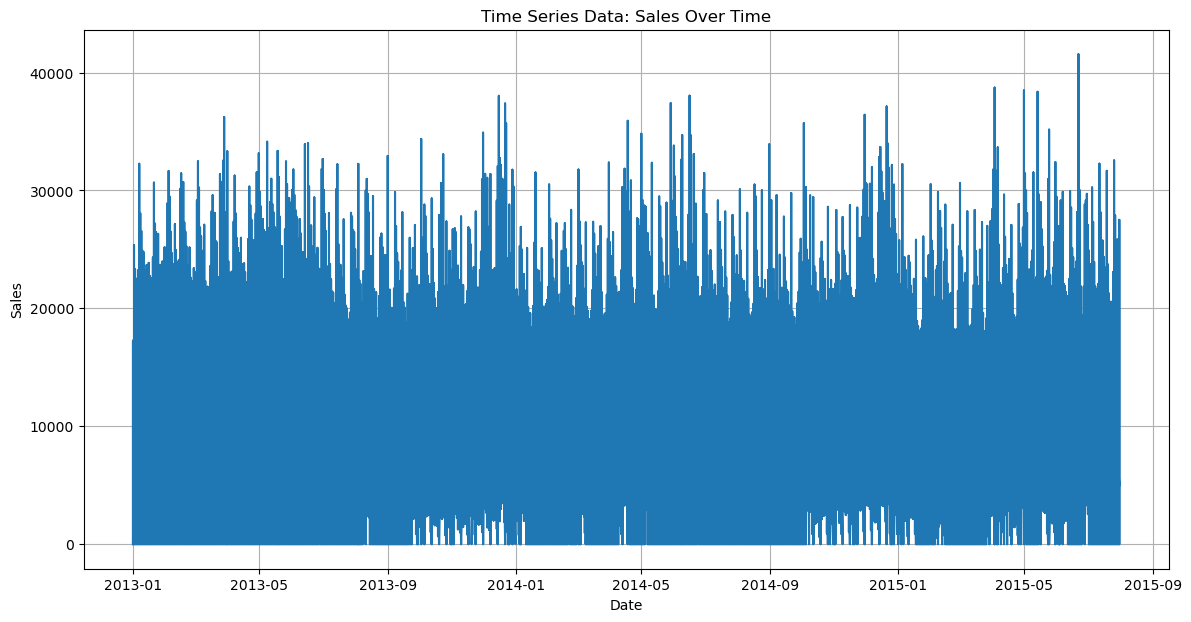

In [25]:
# Assuming 'Store_train' is your time series data
plt.figure(figsize=(14, 7))
plt.plot(Store_train['Sales'])
plt.title('Time Series Data: Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# 2. Decomposition

In [26]:
# # Convert the 'Date' column to datetime format and set it as the index
# Store_train['Date'] = pd.to_datetime(Store_train['Date'])
# Store_train.set_index('Date', inplace=True)

# # Perform seasonal decomposition
# from statsmodels.tsa.seasonal import seasonal_decompose

# result = seasonal_decompose(Store_train['Sales'], model='additive')

# # Plot the decomposed components
# result.plot()
# plt.show()

# 3. Sample Inspection

In [27]:
sample_data = Store_train['Sales'].sample(frac=0.1)
# You can then proceed to apply other methods to this sample_data

# 4. Summary Statistics

In [28]:
print("Mean:", Store_train['Sales'].mean())
print("Variance:", Store_train['Sales'].var())
print("Autocorrelation:", Store_train['Sales'].autocorr())

Mean: 5773.818972305593
Variance: 14821931.554806003
Autocorrelation: 0.5600558456033993


# 5. Rolling Statistics

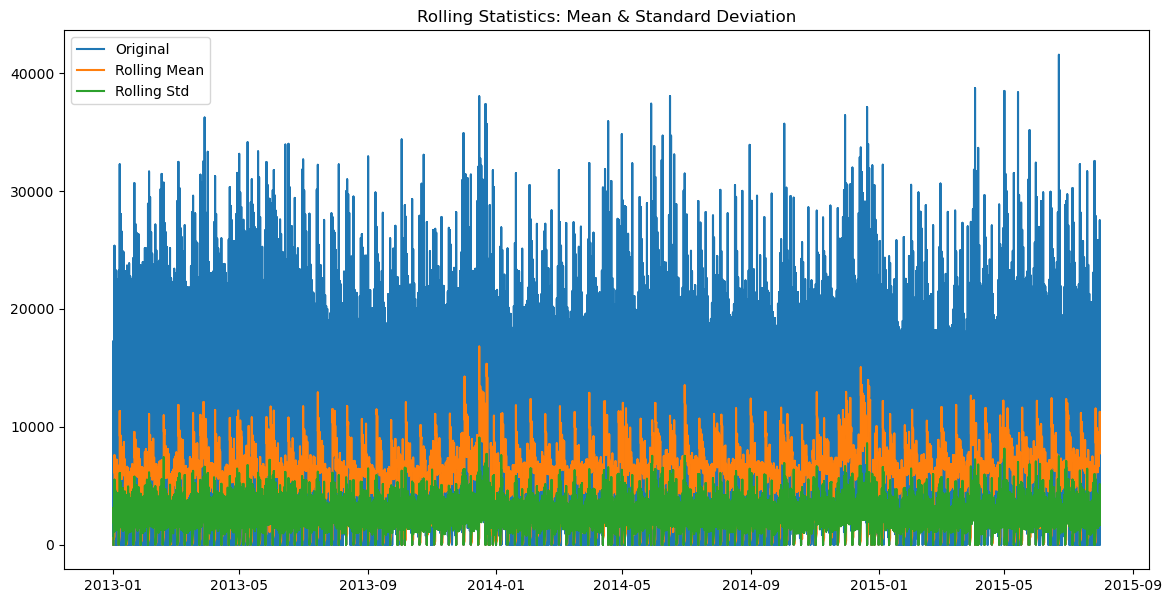

In [29]:
rolling_mean = Store_train['Sales'].rolling(window=30).mean()
rolling_std = Store_train['Sales'].rolling(window=30).std()

plt.figure(figsize=(14, 7))
plt.plot(Store_train['Sales'], label='Original')
plt.plot(rolling_mean, label='Rolling Mean')
plt.plot(rolling_std, label='Rolling Std')
plt.legend()
plt.title('Rolling Statistics: Mean & Standard Deviation')
plt.show()

**3.Depending on your conclusion from 2 above difference your time series data**

In [30]:
# Check the stationarity using the ADF test
from statsmodels.tsa.stattools import adfuller

result = adfuller(Store_train['Sales'].dropna().sample(frac=0.01))  # Using a 1% random sample
p_value = result[1]

# Assuming 0.05 as the significance level
if p_value > 0.05:
    # Time series is non-stationary, so let's difference it
    Store_train['Sales'] = Store_train['Sales'].diff().dropna()

    # Plot the differenced series
    Store_train['Sales'].plot(title='Differenced Time Series')
    plt.show()

    # Check the stationarity again
    result_after_diff = adfuller(Store_train['Sales'].dropna())
    p_value_after_diff = result_after_diff[1]

    if p_value_after_diff <= 0.05:
        print("The differenced time series is now stationary.")
    else:
        print("Differencing did not make the time series stationary.")
else:
    print("The original time series is already stationary.")

The original time series is already stationary.


This code checks the stationarity of the original time series using the ADF test. If it's non-stationary (p-value > 0.05), it applies differencing and plots the differenced series. It then checks the stationarity of the differenced series. If the differenced series is stationary (p-value ≤ 0.05), it prints a message indicating success.

**4.Check for autocorrelation and partial autocorrelation of your data**

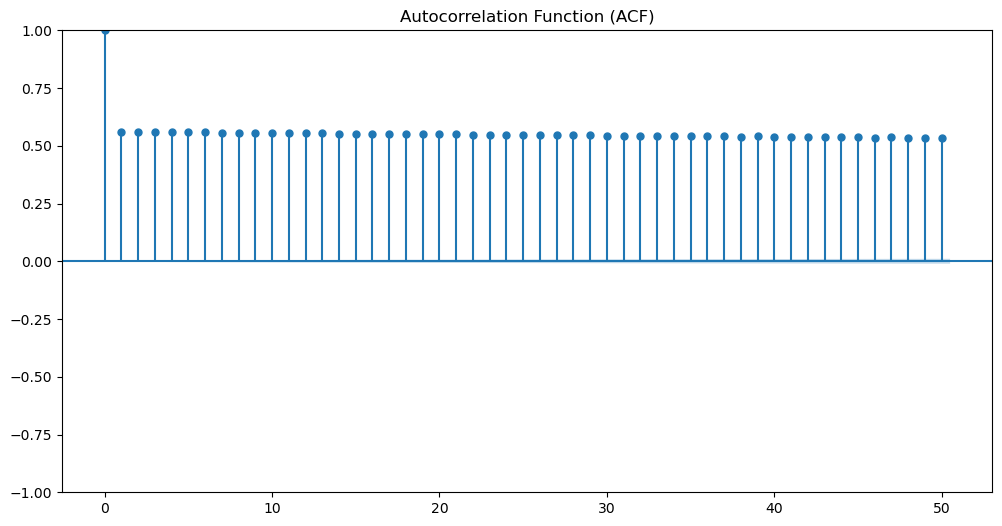

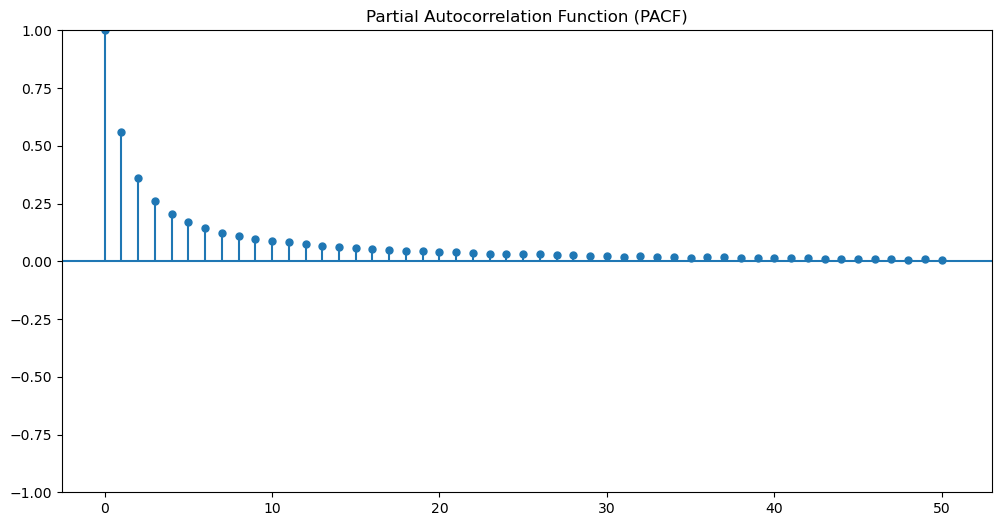

In [31]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'Store_train' is the time series data
sales_series = Store_train['Sales'].dropna()

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
plot_acf(sales_series, lags=50, ax=plt.gca(), title='Autocorrelation Function (ACF)')
plt.show()

# Plot Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
plot_pacf(sales_series, lags=50, ax=plt.gca(), title='Partial Autocorrelation Function (PACF)')
plt.show()

**5.Transform the time series data into supervised learning data by creating a new y(target) column. For example as illustrated here in the Sliding Window For Time Series Data section**

In [32]:
# Assuming 'Store_train' is the time series data
sales_series = Store_train['Sales'].dropna()

# Define the number of lag observations
n_lags = 3  # You can adjust this based on your requirement

# Create a DataFrame with lagged columns
df_supervised = pd.DataFrame({'Sales': sales_series})

for i in range(1, n_lags + 1):
    df_supervised[f'Sales_Lag_{i}'] = sales_series.shift(i)

# Drop rows with NaN values introduced by shifting
df_supervised = df_supervised.dropna()

# Display the resulting DataFrame
print(df_supervised.head())

            Sales  Sales_Lag_1  Sales_Lag_2  Sales_Lag_3
Date                                                    
2013-01-01      0          0.0          0.0          0.0
2013-01-01      0          0.0          0.0          0.0
2013-01-01      0          0.0          0.0          0.0
2013-01-01      0          0.0          0.0          0.0
2013-01-01      0          0.0          0.0          0.0


1.n_lags is the number of lag observations, which determines how many past observations you want to use as input features.

2.A loop is used to create lagged columns (Sales_Lag_1, Sales_Lag_2, ..., Sales_Lag_n_lags) by shifting the original 'Sales' column.

3.Rows with NaN values introduced by shifting are dropped to form the final supervised learning dataset.

4.This DataFrame can now be used for training machine learning models, where the 'Sales' column is the target variable, and the lagged columns are the features. Adjust n_lags based on how many previous time steps you want to consider in your supervised learning setup.

**6.Scale your data in the (-1, 1) range**

In [33]:
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df_supervised' is your supervised learning dataset
features = df_supervised.drop('Sales', axis=1)
target = df_supervised['Sales']

# Use MinMaxScaler to scale features and target
scaler_features = MinMaxScaler(feature_range=(-1, 1))
scaler_target = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform features and target
features_scaled = scaler_features.fit_transform(features)
target_scaled = scaler_target.fit_transform(target.values.reshape(-1, 1))

# Create a new DataFrame with scaled features and target
df_scaled = pd.DataFrame(features_scaled, columns=features.columns)
df_scaled['Scaled_Sales'] = target_scaled

# Display the resulting DataFrame
print(df_scaled.head())

   Sales_Lag_1  Sales_Lag_2  Sales_Lag_3  Scaled_Sales
0         -1.0         -1.0         -1.0          -1.0
1         -1.0         -1.0         -1.0          -1.0
2         -1.0         -1.0         -1.0          -1.0
3         -1.0         -1.0         -1.0          -1.0
4         -1.0         -1.0         -1.0          -1.0


**7.Build a LSTM Regression model to predict the next sale.**





1/1 [==============================] - 0s 472ms/step
Predicted Sales: [4289.0605]


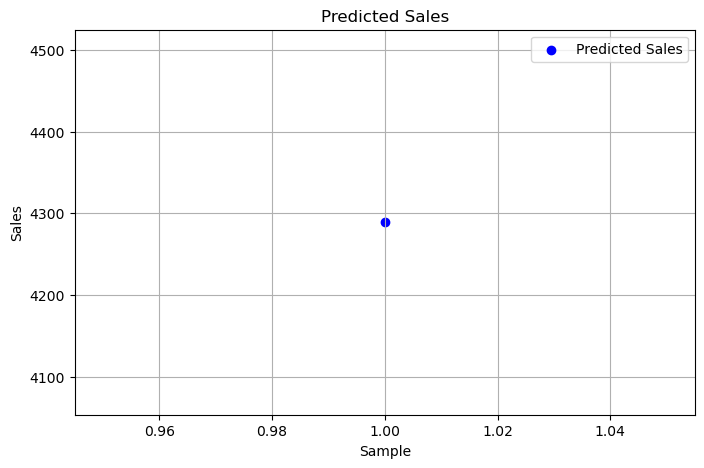

In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

import mlflow

# Set the tracking URI
mlflow.set_tracking_uri('http://127.0.0.1:5000')

# Set the experiment
mlflow.set_experiment('mlops-down')

# Assuming 'df' is your DataFrame and 'target_column' is the column you want to predict
X = df_supervised.drop('Sales', axis=1)
y = df_supervised['Sales']

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.values)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Define the sequence length (number of time steps to consider)
sequence_length = 10

# Function to create sequences for input data and corresponding target
def create_sequences(data, target, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length):
        seq = data[i:i+sequence_length]
        label = target[i+sequence_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)

# Create sequences and targets
X_sequences, y_targets = create_sequences(X_scaled, y_scaled.flatten(), sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sequences, y_targets, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_test, y_test))


# Assuming 'new_data_for_prediction' is your DataFrame with categorical variables
new_data_encoded = Store_train1['Sales']

# Normalize the new data using MinMaxScaler
new_data_scaled = scaler.transform(new_data_encoded.values.reshape(-1, 1))

# Create the sequence for the new data
new_data_sequence = new_data_scaled[-sequence_length:].reshape(1, sequence_length, 1)  # Change the last dimension to match the original features

# Repeat the sequence to match the number of features in the training data
new_data_sequence = np.repeat(new_data_sequence, X_train.shape[2], axis=-1)

# Predict the sales for the new data
predicted_sales_scaled = model.predict(new_data_sequence)

# Inverse transform the predicted sales to the original scale
predicted_sales_original = scaler.inverse_transform(predicted_sales_scaled.reshape(-1, 1))

# Display the predicted sales
print("Predicted Sales:", predicted_sales_original.flatten())
# Plot the results
plt.figure(figsize=(8, 5))

# Scatter plot for predicted sales
plt.scatter([1], predicted_sales_original.flatten(), label='Predicted Sales', color='blue', marker='o')

plt.title('Predicted Sales')
plt.xlabel('Sample')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

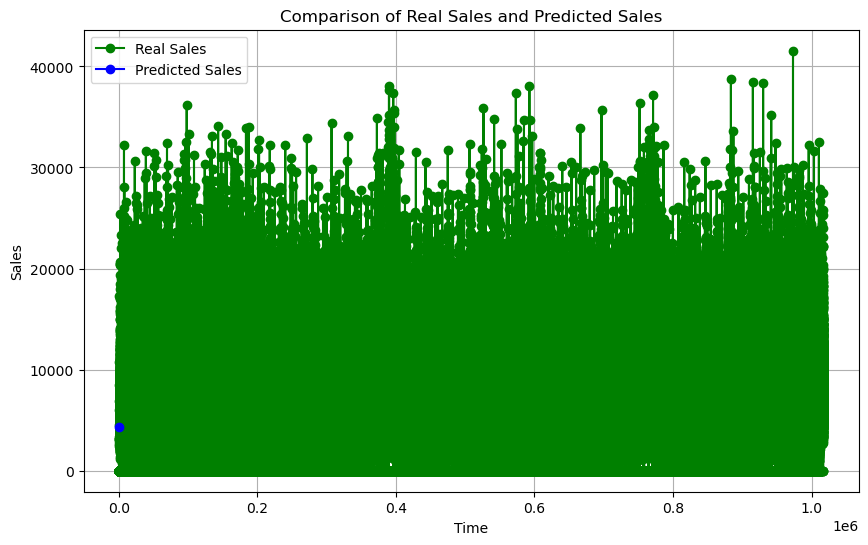

In [35]:
# Extract real sales from the DataFrame
real_sales = df_supervised['Sales'].values

# Plotting the real and predicted sales
plt.figure(figsize=(10, 6))
plt.plot(real_sales, label='Real Sales', marker='o', linestyle='-', color='green')
plt.plot(predicted_sales_original.flatten(), label='Predicted Sales', marker='o', linestyle='-', color='blue')

plt.title('Comparison of Real Sales and Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# 2.7 Using MLFlow to serve the prediction
Use the code snippet provided by mlflow to make inference on your test data 


In [36]:
#pip install mlflow 

In [37]:
import mlflow

print(mlflow.__version__)

2.9.2


# 1.To use MLflow to serve predictions on your test data, you can follow these steps:

Load the Model:
Load the trained model using MLflow. You will need to specify the model name or the run ID.

In [38]:
import os
import joblib

# Create the directory if it does not exist
directory_path = "AI course Digicrome/Assignment/Work sheet/Pharmaceutical Sales prediction across multiple stores/"
os.makedirs(directory_path, exist_ok=True)

# Save the model
joblib.dump(model, directory_path + "model_2024-02-05-14-32-59-188.pkl")


['AI course Digicrome/Assignment/Work sheet/Pharmaceutical Sales prediction across multiple stores/model_2024-02-05-14-32-59-188.pkl']

In [39]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np

# Assuming 'model' is your scikit-learn linear regression model
model = LinearRegression()

# Log the model with MLflow for scikit-learn
artifact_path = "sales_prediction_model"  # Replace with the desired path

# Check if there is an active run
if mlflow.active_run():
    # End the active run
    mlflow.end_run()

# Start a new MLflow run for the scikit-learn model
with mlflow.start_run():
    mlflow.sklearn.log_model(model, artifact_path)

# End the active run
mlflow.end_run()

# Define the sequence length (number of time steps to consider)
sequence_length = 10

def create_sequences(data, sequence_length):
    sequences, targets = [], []
    for i in range(len(data) - sequence_length + 1):
        seq = data[i:i+sequence_length]
        if isinstance(data, pd.DataFrame):
            label = data.iloc[i+sequence_length-1]['Scaled_Sales']
        else:
            label = data[i+sequence_length-1]
        sequences.append(seq)
        targets.append(label)
    sequences = np.array(sequences)
    targets = np.array(targets)
    if len(sequences.shape) == 2:
        sequences = np.expand_dims(sequences, axis=2)
    return sequences, targets

# Create sequences and targets
X, y = create_sequences(df_scaled, sequence_length)
y = y.reshape(-1, 1)  # Reshape y to match LSTM input shape

# Ensure the shapes of X and y match
assert X.shape[0] == y.shape[0], "Number of samples in X and y do not match"

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, shuffle=False)

# Build the LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Start a new MLflow run for the LSTM model
with mlflow.start_run():
    # Train the model
    model.fit(X_train, y_train, epochs=1, batch_size=32, validation_data=(X_val, y_val))

    # Make predictions on the test set
    X_test_sequences, _ = create_sequences(X_val, sequence_length)

   # Reshape X_test_sequences to remove the extra dimension
    X_test_sequences = X_test_sequences.reshape(X_test_sequences.shape[0], X_test_sequences.shape[1], X_test_sequences.shape[2] * X_test_sequences.shape[3])

    # Check the shape of X_test_sequences
    print(X_test_sequences.shape)


2024/02/06 12:30:53 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh()

All git commands will error until this is rectified.

This initial warning can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|none|n|0: for no warning or exception
    - warn|w|warning|1: for a printed warning
    - error|e|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet



28609/28609 [==============================] - 1557s 54ms/step - loss: 4.5845e-04 - val_loss: 8.2946e-07
(101711, 10, 40)


In [40]:
import mlflow

# Start a run and log the model
with mlflow.start_run():
    # ... train and log the model with mlflow.sklearn.log_model() or other appropriate method

    # Get the run ID
    run_id = mlflow.active_run().info.run_id

# Specify the artifact path (assuming it's a local directory)
artifact_path = "sales_prediction_model"

# Get the absolute path to the saved model artifact
model_path = f"mlruns/0/{run_id}/artifacts/{artifact_path}"

# Display the model path
print("Model Artifact Path:", model_path)


Model Artifact Path: mlruns/0/45f632f6d31643fbb1f3c8338f8615c1/artifacts/sales_prediction_model


In [ ]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')
mlflow.set_experiment('mlops-down')
